In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
import regex as re

from sklearn.model_selection import train_test_split
from tqdm import tqdm

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import  ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV



from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, RocCurveDisplay



from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score

from sklearn.ensemble import RandomForestClassifier

import eli5


import scipy.sparse as sparse
import pickle
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.preprocessing import LabelEncoder

# 1. Load Train

In [19]:
df = pd.read_csv('../../data/for_linear_models/train_feature_graph_values.csv' , header=0)#,  on_bad_lines='skip')
df

,compiller,version,compiler_option,name_hash,instructions_count,func_body,vcount,diameter,girth,radius,average_path_length,transitivity_avglocal_undirected
0,gcc,10.2.1,Og,09e29e012476cbc7fbc8f4aea11dfc95,823,"['push r15', 'mov r15, rdx', 'push r14', 'mov ...",182,34,3.0,0,15.027724,0.151361
1,gcc,10.2.1,Og,7a0bf6fdc429813ac22c6214adfd4169,102,"['cmp rdx, ADDR', 'jbe FCN', 'add rdx, 1', 'mo...",22,8,4.0,0,3.386598,0.000000
2,gcc,9.3.0,Ofast,671f56991dda1de967d83ddb26e000ef,87,"['push r15', 'push r14', 'mov r14, rcx', 'push...",19,10,3.0,0,3.710526,0.157407
3,gcc,9.3.0,Ofast,cdbc9d3aace74424320af209eac9c0bf,45,"['push r12', 'lea rax, [ADDR]', 'push rbp', 'l...",8,4,3.0,2,2.236842,0.208333
4,gcc,9.3.0,Ofast,0dbef1318f69d668de203321b5c0f6b6,20,"['push rbp', 'push rbx', 'sub rsp, 8', 'mov rb...",4,2,4.0,0,1.333333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
14432,gcc,9.3.0,Ofast,d34be2c837f108db9ed55521b87608a7,128,"['push r13', 'lea rax, [ADDR]', 'push r12', 'm...",31,15,3.0,0,5.703883,0.234864
14433,gcc,10.2.1,Og,cb4b6d072b31c18cf5336e4616afbeb0,26,"['lea rax, [ADDR]', 'push r12', 'lea r12, [rdi...",3,1,3.0,0,1.000000,1.000000
14434,gcc,9.3.0,Ofast,4a6a674dc33f45db452ebf88aacb3bc8,21,"['push rbx', 'mov rbx, rdi', 'mov rdi, qword [...",8,4,3.0,0,2.000000,0.437500
14435,gcc,9.3.0,Ofast,55b9f9258bb3133c2e6a95b43bcd8d28,20,"['test rdi, rdi', 'je ADDR', 'push rbp', 'mov ...",8,4,3.0,0,2.071429,0.375000


In [18]:
y_train = df["func_class"]
df.drop("func_class", axis=1, inplace=True)

# 2. Prepare data in needed format

In [4]:
vec = TfidfVectorizer(ngram_range=(1, 3))
bow = vec.fit_transform(df["func_body"])

In [5]:
X_train_sparse = sparse.hstack((sparse.csr_matrix(bow), df[["vcount","diameter","girth","radius","average_path_length","transitivity_avglocal_undirected"]])) 

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

# 3.1  DecisionTreeClassifier

In [41]:
DTCer = DecisionTreeClassifier()
DTCer.fit(X = X_train_sparse , y = y_train)

DecisionTreeClassifier()

###  Train score

In [42]:
val_predict = DTCer.predict(X_train_sparse)
print("Accuracy: {}".format(accuracy_score(val_predict, y_train)))
print("F1 micro: {}".format(f1_score(val_predict, y_train, average= "micro")))
print("F1 macro: {}".format(f1_score(val_predict, y_train, average= "macro")))

Accuracy: 0.9482579483272148
F1 micro: 0.9482579483272148
F1 macro: 0.9083568880886356


### Feature importance

<AxesSubplot: xlabel='Value', ylabel='Name'>

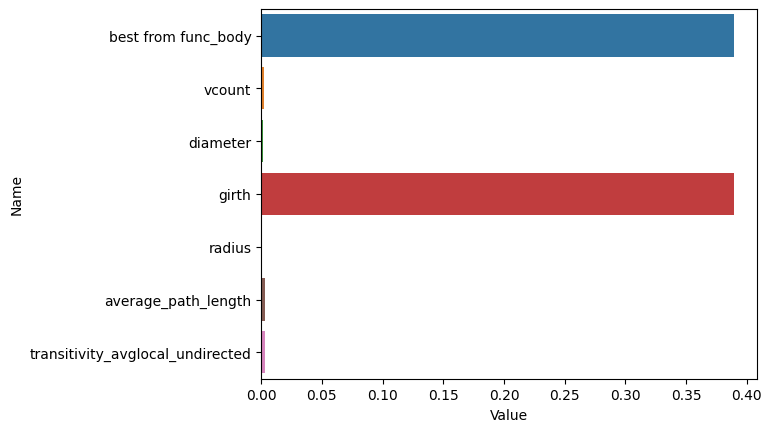

In [40]:
Names = [ "best from func_body", "vcount","diameter","girth","radius","average_path_length","transitivity_avglocal_undirected"]
Values = [DTCer.feature_importances_.max(), *DTCer.feature_importances_[-6:]]
data = pd.DataFrame({'Name': Names, 'Value':Values})
sns.barplot(data=data, y="Name", x="Value")

### Try find best parameters by GreedSearch 

In [48]:
parameters = { 
    'ccp_alpha': [0, .1,1,5,10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(9,35),
    'criterion' :['gini', 'entropy']
}

clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=8, cv = 5)
clf.fit(X=X_train_sparse, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

0.7849271066112585 {'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': 31, 'max_features': 'auto'}


In [49]:
# best parameters from GreedSearch {'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': 31, 'max_features': 'auto'}
DTCerB = DecisionTreeClassifier(ccp_alpha = 0, criterion = 'entropy', max_depth =  31, max_features = 'auto')
DTCerB.fit(X = X_train_sparse , y = y_train)
val_predict = DTCerB.predict(X_train_sparse)
print("Accuracy: {}".format(accuracy_score(val_predict, y_train)))
print("F1 micro: {}".format(f1_score(val_predict, y_train, average= "micro")))
print("F1 macro: {}".format(f1_score(val_predict, y_train, average= "macro")))

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Accuracy: 0.9079448638913902
F1 micro: 0.9079448638913902
F1 macro: 0.8669249360756363


#### it's not better then standart model

In [43]:
pickle.dump(DTCer, open("../../models_pickle/DecisionTree.pkl", "wb"))

# 3.2  Random Forest

In [44]:
RFCer = RandomForestClassifier()
RFCer.fit(X=X_train_sparse, y=y_train)

RandomForestClassifier()

###  Train score

In [45]:
val_predict = RFCer.predict(X_train_sparse)
print("Accuracy: {}".format(accuracy_score(val_predict, y_train)))
print("F1 micro: {}".format(f1_score(val_predict, y_train, average= "micro")))
print("F1 macro: {}".format(f1_score(val_predict, y_train, average= "macro")))

Accuracy: 0.9482579483272148
F1 micro: 0.9482579483272148
F1 macro: 0.907964543683028


In [46]:
pickle.dump(RFCer, open("../../models_pickle/RandomForest.pkl", "wb"))

# 3.3  CatBoost

In [28]:
class CustomStandardScaler(TransformerMixin, BaseEstimator):

    def __init__(self, cols_to_transform, col_names_list_for_sparse = None):
        self.cols_to_tr_ = cols_to_transform
        self.col_names_list_for_sparse_ = col_names_list_for_sparse    
        

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.col_names_list_for_sparse_: # work with sparse matrix
            sparse_indexes = []
            for i, val_i in enumerate(self.col_names_list_for_sparse_):
                for j, val_j in enumerate(self.cols_to_tr_):
                    if val_i == val_j:
                        sparse_indexes.append(i)
                        
            print(sparse_indexes)     
            for index_col in sparse_indexes:
                X_tmp = X[:,index_col].toarray()
                X[:, index_col] = (X_tmp- X_tmp.mean())/X_tmp.std()            
        else:                              # simple pd.DataFrame
            X_tmp = X[self.cols_to_tr_]
            X[self.cols_to_tr_] = (X_tmp-X_tmp.mean())/X_tmp.std()
        return X
    


In [6]:
# col_names_list_for_sparse = ["vcount","diameter","girth","radius","average_path_length","transitivity_avglocal_undirected"]
# col_names_all = [str(i) for i,x in enumerate(DTCer.feature_importances_)]
# col_names_all = [*col_names_all, *col_names_list_for_sparse]  ## for sparse matrix
        


# pipe = [
#     ('std_scaling', CustomStandardScaler(cols_to_transform=col_names_list_for_sparse, 
#                       col_names_list_for_sparse = col_names_all )),
#     ('catboost', CatBoostClassifier())
# ]
# catboost_pipeline = Pipeline(pipe)
# catboost_pipeline.fit(X_train_sparse, y_train)

catboost = CatBoostClassifier()
catboost.fit(X_train_sparse, y_train)

In [ ]:
val_predict = catboost.predict(X_train_sparse)
print("Accuracy: {}".format(accuracy_score(val_predict, y_train)))
print("F1 micro: {}".format(f1_score(val_predict, y_train, average= "micro")))
print("F1 macro: {}".format(f1_score(val_predict, y_train, average= "macro")))

## my computer don't holded CatBoostClassifier...

# 3.4  XGBoost

In [24]:
XGBCer = XGBClassifier()
XGBCer.fit(X_train_sparse, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

### Train score

In [26]:
val_predict = XGBCer.predict(X_train_sparse)
print("Accuracy: {}".format(accuracy_score(val_predict, y_train)))
print("F1 micro: {}".format(f1_score(val_predict, y_train, average= "micro")))
print("F1 macro: {}".format(f1_score(val_predict, y_train, average= "macro")))

Accuracy: 0.9431322296876082
F1 micro: 0.9431322296876082
F1 macro: 0.9054175084247906


In [27]:
pickle.dump(XGBCer, open("../../models_pickle/XGBClassifier.pkl", "wb"))

# 3.5 LGBMClassifier

In [29]:
LGBMCer = LGBMClassifier()
LGBMCer.fit(X_train_sparse, y_train)

LGBMClassifier()

### Train score

In [30]:
val_predict = LGBMCer.predict(X_train_sparse)
print("Accuracy: {}".format(accuracy_score(val_predict, y_train)))
print("F1 micro: {}".format(f1_score(val_predict, y_train, average= "micro")))
print("F1 macro: {}".format(f1_score(val_predict, y_train, average= "macro")))

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/lightgbm/basic.py:859: UserWarning: Converting data to scipy sparse matrix.
  _log_warning('Converting data to scipy sparse matrix.')


Accuracy: 0.9463877536884394
F1 micro: 0.9463877536884394
F1 macro: 0.9074649666973832


In [31]:
pickle.dump(LGBMCer, open("../../models_pickle/LGBMClassifier.pkl", "wb"))

# 3.6 StackingClassifier

In [33]:
DT = pickle.load(open('../../models_pickle/DecisionTree.pkl', 'rb'))
RF = pickle.load(open('../../models_pickle/RandomForest.pkl', 'rb'))
#CB = pickle.load(open('./CB.pkl', 'rb'))
XGB = pickle.load(open('../../models_pickle/XGBClassifier.pkl', 'rb'))
LGBm = pickle.load(open('../../models_pickle/LGBMClassifier.pkl', 'rb'))


estimators = [
     ('DT', DT),
     ('RF', RF),
     #('CB', CB),
     ('XGB', XGB),
     ('LGBm', LGBm)
 ]

SC = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), stack_method = 'predict_proba')

SC.fit(X_train_sparse, y_train)

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(estimators=[('DT', DecisionTreeClassifier()),
                               ('RF', RandomForestClassifier()),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='multi:softprob',
                                              predictor=None, ...)),
                               ('LGBm', LGBMClassifier())],
                   final_estimator=LogisticRegression(),
                   stack_method='predict_proba')

### Train score

In [34]:
val_predict = SC.predict(X_train_sparse)
print("Accuracy: {}".format(accuracy_score(val_predict, y_train)))
print("F1 micro: {}".format(f1_score(val_predict, y_train, average= "micro")))
print("F1 macro: {}".format(f1_score(val_predict, y_train, average= "macro")))

/home/user/VSHE/python_venv/mlds/lib/python3.9/site-packages/lightgbm/basic.py:859: UserWarning: Converting data to scipy sparse matrix.
  _log_warning('Converting data to scipy sparse matrix.')


Accuracy: 0.9458336219436171
F1 micro: 0.9458336219436171
F1 macro: 0.9063080327457571


In [35]:
pickle.dump(SC, open("../../models_pickle/StackingClassifier.pkl", "wb"))

# 4. Test score by best model

In [38]:
df_test = pd.read_csv('../../data/for_linear_models/test_feature_graph_values.csv' , header=0)#,  on_bad_lines='skip')
y_test = df_test["func_class"]
#le = LabelEncoder()
y_test = le.transform(y_test)


df_test.drop("func_class", axis=1, inplace=True)
#vec = TfidfVectorizer(ngram_range=(1, 3))
bow = vec.transform(df_test["func_body"])


X_test_sparse = sparse.hstack((sparse.csr_matrix(bow), df_test[["vcount","diameter","girth","radius","average_path_length","transitivity_avglocal_undirected"]]))

In [47]:
RF = pickle.load(open('../../models_pickle/RandomForest.pkl', 'rb'))

In [48]:
val_predict = RF.predict(X_test_sparse)
print("Accuracy: {}".format(accuracy_score(val_predict, y_test)))
print("F1 micro: {}".format(f1_score(val_predict, y_test, average= "micro")))
print("F1 macro: {}".format(f1_score(val_predict, y_test, average= "macro")))

Accuracy: 0.8664819944598338
F1 micro: 0.8664819944598338
F1 macro: 0.8033843144054397


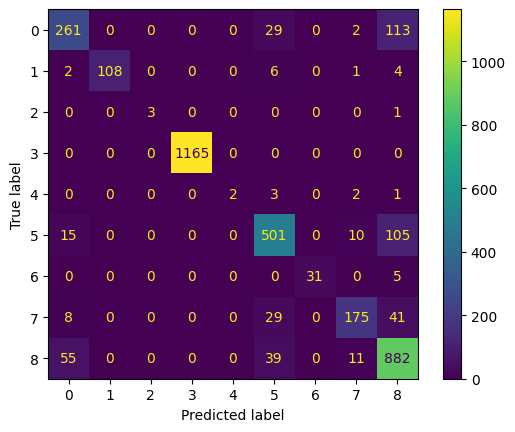

In [50]:
cm5 = confusion_matrix(y_test, val_predict)
cm_display5 = ConfusionMatrixDisplay(cm5).plot()